# M02_E09_Python_Audio

### PENSAMIENTO COMPUTACIONAL   

* Prof. Ricardo Vega M. - Escuela de Diseño Universidad Católica de Chile.  

* Renombrar archivo así: M02_E0X_apellido_nombre_rut, por ejemplo:
M02_E0X_vega_ricardo_102349285  

* Renombrar el título así: M0X_E0X_PRINT_SUMAR_apellido_nombre_rut, por ejemplo:
M02_E0X_STRINGS_vega_ricardo_102349285

* X equivale al número de la tarea.

En la tarea de esta semana, veremos estas cosas:

* A- Audio: Los sonidos son ondas.
* B- Audio: Samples. Cargar y reproducir samples.   
* C- Audio: Graficar ondas.  

Deben subir la carpeta snd a su drive.

## 0- IMPORTAR LIBRERIAS

Usaremos la librerías Matplotlib (visualización), Numpy (para procesar datos, y realizar operaciones de vectores, y matrices), permite almacenar y transformar estructuras de datos, hacer estadística básica, entre otras operaciones. IPython.display para reproducir audios.


In [ ]:
## importar
import matplotlib.pyplot as plt

# importar numpy
import numpy as np

## Para mostrar sonidos en el notebook
from IPython.display import Audio, display


## A- Audio: Los sonidos son ondas. Importar y reproducir tipos de onda.   

Para empezar debemos considerar que cualquier sonido es una onda que
se mueve en un medio, puede ser el aire, agua, u otro material.

<img src="https://files.soniccdn.com/imagehosting/04/ondasinusoidal_14683_640.jpg" height="250">

**Onda sinusoidal:**  Es la onda simple, es curva, tiene frecuencia y amplitud (Imagen de Hispasonic.com).

**Amplitud de onda:**  Qué tan grande en sentido vertical es la onda. Mientras más grande, el volúmen del sonido es más alto.  

<img src="https://files.soniccdn.com/imagehosting/f6/tono1002004001000_14694_640.jpg" height="250">

**Frecuencia de la onda:**  Qué tantas ondas hay en un segundo (en Hertz x segundo), esto es lo que cambia el tono. Mientras más ondas hay en un segundo, más alto, mientras menos, es más bajo el tono. Otras frecuencias, otros tonos (imagen de Hispasonic.com)

En el computador estas y otras variables controlan qué tipo de sonido se genera: amplitud, frecuencia, duración, etc. Recuerdan la representación numérica de Manovich?. Programas como Audacity u otros, modifican variables de las ondas aplicando transformaciones a los valores  de estas variables.   

Pero no solo existen ondas sinusoidales, existen otros tipos de onda. Y dependiendo del tipo de onda, es la textura del sonido, por decirlo de alguna manera. Es así como existen ondas sinusoidales, cuadradas, triangulares, diente de sierra, y sus mezclas (imagen de amsi.org.au).

<img src="https://amsi.org.au/ESA_Senior_Years/imageSenior/3g_17.png" height="250">

Se debe considerar además que en audio digital hay diferentes formatos: .mp3, oog, .wav, etc.


In [ ]:
## A- Sonido: Ejemplos de tipos de onda.
## Primero, motar el drive desde donde obtener los archivos de la carpeta snd
## recordar subir la carpeta snd a su drive.

## Montar el drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
## A- Sonido: Ejemplos de tipos de onda.
## Traer los sonidos desde su ruta en el drive.
## Ir al ícono de carpeta en la barra lateral
## Luego Drive/MyDrive navegar y llegar a la carpeta donde tienen su material de audio
## Algo así les va a aparecer: '/content/drive/MyDrive/su_ruta_a_la_carpeta/el_archivo.ogg'
## Ponerse sobre el archivo de audio, ir a los tres puntitos, y copiar ruta de acceso
## Pegar la ruta en la variable correspondiente.

## debe tener variables para cada audio.
## Esta ruta no le va a correr, debe poner su rura a los archivos.

ruta = '/content/drive/MyDrive/_2025B_UC/UC_DIS_PComp_2025B/10_PCOMP_Repo/colab_2024B_base/M02_Ejercicios/snd/'
onda_sinusoide = ruta + 'onda_sinusoide.ogg'

## Reproducir sonido (los ejemplos de onda estan en formato ogg)
Audio(onda_sinusoide)


## B- Sonido: samples.   

Hay dos grandes maneras de trabajar con audio en el computador: samples y sintesis. En este notebook veremos samples.  

**Los samples** son sonidos que están pregrabados y se usan como archivos externos. Muchos instrumentos digitales usan samples de audio para "imitar" sonidos de instrumentos análogos, por ejemplo el violín.

Los samples a usar están en formato wav.


In [ ]:
## B- Sonido, cargando samplers de audio.
## Cargar sonido pregrabado de violín (recuerde usar la ruta al archivo desde su drive.

ruta = '/content/drive/MyDrive/_2025B_UC/UC_DIS_PComp_2025B/10_PCOMP_Repo/colab_2024B_base/M02_Ejercicios/snd/'
sampler_violin = ruta + 'sampler_violin.wav'

Audio(sampler_violin)


## C- Sonido: graficar ondas.  

Los sonidos no son planos, tienen una estructura conocida como envolvente, y que tiene algunas partes conocidas como ADSR, esto es Ataque (Attack), Decaimiento (Decay), Sostenimiento (Sustain) y Relajamiento (Release). ¿Y que significan?:

**Ataque (Attack):** cuando el sonido comienza tiene un peak...   

**Decaimiento (Decay):** despues de comenzar, tiene una leve baja...   

**Sostenimiento (Sustain):** llega a un punto donde se mantiene...

**Relajamiento (Release):** y finalmente cuando el sonido se desvanece.


<img src="https://linuxaudio.github.io/libremusicproduction/html/sites/default/files/answers/adsrenvelope.png" height="250">

La imagen muestra el proceso de esta envolvente (imagen https://linuxaudio.github.io). Esto no significa que todos los sonidos tienen exactamente esta forma, sino que es una estructura para entender cómo se comporta el sonido desde que comienza hasta que termina, con variaciones entre medio.  


In [ ]:
## Importar librerías para graficar ondas
import wave # para evaluar ondas


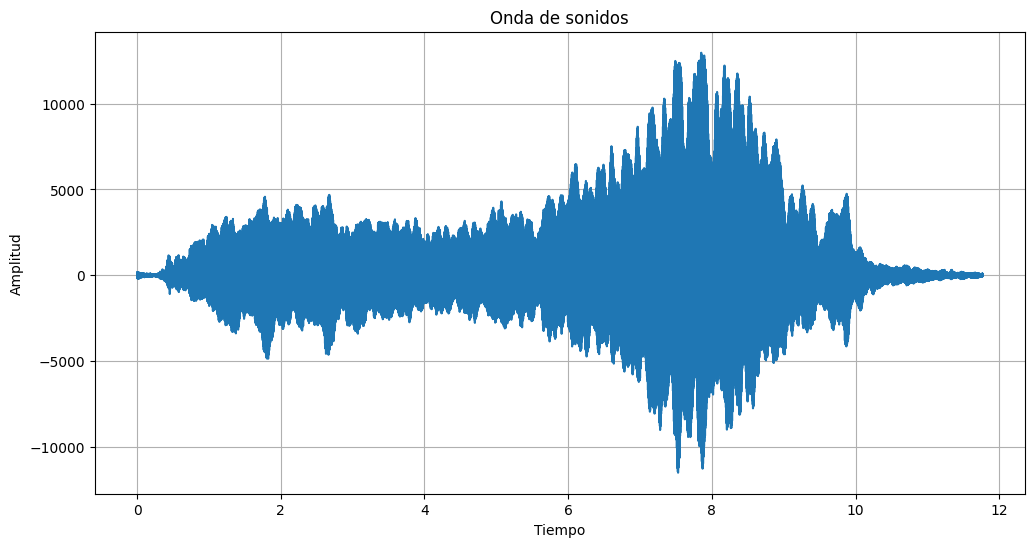

In [ ]:
## Graficar sonido monofónico simple.

## Preparar el sonido
cual_sample = sampler_violin

raw   = wave.open( cual_sample ) # leer audio
senal = raw.readframes(-1)     # leer todos los frames, -1 todos o el máximo de frames
senal = np.frombuffer(senal, dtype ="int16")
f_rate = raw.getframerate() # toma el frame rate

# framerate % tamano de senal para mostrarlo como segundos en x-axis
# crea el vector de tiempo y lo muestra en el tamano del audio.
time = np.linspace(
  0,
  len(senal) / f_rate,
  num = len(senal)
)

## Crear gráfico con matplotlib
plt.subplots(figsize=(12, 6))
plt.title("Onda de sonidos")  # título
plt.grid(True) # grilla
plt.xlabel("Tiempo") # x-axis
plt.ylabel("Amplitud")
plt.plot(time, senal) # el grafico
plt.show() # mostrar


## - - - - - - - - Ahora Usted! - - - - - - - - - - - - -

## REPLICAR PROCESO

Replique todos los siguientes pasos del 1 al 3.  

    1- Audio: Los sonidos son ondas.
    2- Audio: Samples. Cargar y reproducir samples.
    3- Audio: Graficar ondas.

Recuerde que al comenzar se debe importar las librerías correspondientes que están al inicio del archivo. Puede crear las celdas que necesite.


## 1- Audio: Los sonidos son ondas. Importar y reproducir tipos de onda (1 punto).   

**Descripción**  

Para traer los sonidos desde su ruta en el drive:   
Ir al ícono carpeta en la barra lateral, luego Drive/MyDrive navegar.   

Llegar a la carpeta donde tienen su material de audio. Algo así les va a aparecer: '/content/drive/MyDrive/su_ruta_a_la_carpeta/el_archivo.ogg'

Ponerse sobre el archivo de audio, ir a los tres puntitos, y copiar ruta de acceso.

Luego pegar la ruta en la variable correspondiente, y correr la celda.


In [ ]:
## 1- Su respuestas desde acá...

## Variables para cada audio (sinusoide como ejemplo)
## La celda no va a correr, debe poner su ruta a los archivos.
ruta = '/content/drive/MyDrive/_2025B_UC/UC_DIS_PComp_2025B/10_PCOMP_Repo/colab_2024B_base/M02_Ejercicios/snd/'

# ejemplo de ruta
onda_sinusoide = ruta + 'onda_sinusoide.ogg'

## Cargar las otras ondas en celdas separadas.
## ojo tener volumen de audio medio bajo
## notan las diferencias en las "texturas" de los sonidos?
Audio(onda_sinusoide)


In [ ]:
# para la onda cuadrada.
onda_cuadrada = ruta + '?'
Audio(onda_cuadrada)


In [ ]:
# para la onda triangular.
onda_triangular = ruta + '?'
Audio(onda_triangular)


In [ ]:
# para la onda diente de sierra.
onda_dientesierra = ruta + '?'
Audio(onda_dientesierra)


## 2- Audio: Samples. Cargar y reproducir 5 samples.

**Descripción**  
Cargar desde la carpeta de audio 5 samples a elección. Estos son samples de una batería estandar.  


In [ ]:
## 2- Su respuestas desde acá...

## Cargar sonido pregrabado o samples de alguno de estos (recuerde usar la ruta al archivo desde su drive.
## ejemplo violín.
ruta = '/content/drive/MyDrive/_2025B_UC/UC_DIS_PComp_2025B/10_PCOMP_Repo/colab_2024B_base/M02_Ejercicios/snd/'
sample_1 = ruta + 'sampler_violin.wav'

## Cargar alguno de estos:
## sample_clap_a.wav
## sample_click_a.wav
## sample_click_b.wav
## sample_cowbell_a.wav
## sample_hihat_a.wav
## sample_hihat_b.wav
## sample_kick_a.wav
## sample_snare_a.wav
## sample_snare_b.wav
## sample_snare_c.wav
## sample_violin.wav

## En estas variables,
sample_1 = '?'
sample_2 = '?'
sample_3 = '?'
sample_3 = '?'
sample_3 = '?'

In [ ]:
## Su respuestas desde acá...
## hacer una celda por cada sample
Audio( sample_? )


In [ ]:
Audio( sample_? )

## 3- Audio: Graficar ondas.  

**Descripción**  
Usando el código de "C- Sonido: graficar ondas", escoger cualquiera de los samples y graficar su onda (al menos 3). Usar alguno de estos:

* sample_clap_a.wav
* sample_click_a.wav
* sample_click_b.wav
* sample_cowbell_a.wav
* sample_hihat_a.wav
* sample_hihat_b.wav
* sample_kick_a.wav
* sample_snare_a.wav
* sample_snare_b.wav
* sample_snare_c.wav

¿Cómo se ve la onda de una percusión en relación a la onda del violín?


In [ ]:
## Su respuestas desde acá...


In [ ]:
## Su respuestas desde acá...
